# 7. 소프트맥스 회귀(Softmax Regression) - 다중 클래스 분류

## 1) 다중 클래스 분류(Multi-class Classification)
> 세 개 이상의 선택지 중 하나를 고르는 문제

- Example  
꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이로부터 setosa, versicolor, virginica라는 3개의 품종 중 어떤 품종인지를 예측

|SepalLengthCm($x_1$)|SepalWidthCm($x_2$)|PetalLengthCm($x_3$)|PetalWidthCm($x_4$)|Species($y$)|
|---|---|---|---|---|
|5.1|3.5|1.4|0.2|setosa|
|4.9|3.0|1.4|0.2|setosa|
|5.8|2.6|4.0|1.2|versicolor|
|6.7|3.0|5.2|2.3|verginica|
|5.6|2.8|4.9|2.0|versinica|

$\Longrightarrow$ 하나의 샘플 데이터에 대한 예측값으로 모든 가능한 정답지에 대해서 정답일 확률의 합이 1이 되도록 설정

## 2) 소프트맥스 함수(Softmax function)
> 분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정

$p_i$가 각각 $i$번 클래스가 정답일 확률을 나타낸다고 할 때,

$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$  
$\Longrightarrow softmax(z) = [\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}]$

$i$가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정

<img src=softmax1_final_final_ver.png width=400>

### (1) 소프트맥스 함수의 input으로 어떻게 바꾸지?
- 하나의 샘플 데이터는 4개의 독립 변수 x를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음
- 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 **3차원 벡터**로 변환되어야 함

<img src=softmaxbetween1and2.png width=300>

- 소프트맥스 함수의 입력 벡터 z의 차원수만큼 결과값이 나오도록 가중치 곱을 진행하면 됌  
- 위의 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경

### (2) 오차를 어떻게 계산하지?
- 소프트맥스 함수는 분류하고자 하는 클래스 개수만큼의 차원을 갖는 벡터를 가짐(각 성분은 0과 1사이 값 = 각 클래스가 정답일 확률)
- 예측값과 비교를 할 수 있는 실제값의 표현 방법 $\Longrightarrow$ 원-핫 벡터

<img src=softmax2_final.png width=300>

<img src=softmax6_final_2ldz1s0.png width=450>



## 3) 원-핫 벡터의 무작위성
일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현하였다고 할 수 있습니다.

## 4) 비용 함수(Cost function)
- 소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용

### 크로스 엔트로피 함수
- $y$ : 실제 값
- $k$ : 클래스 개수
- $y_j$ : 실제 원-핫 벡터의 $j$번째 인덱스
- $p_j$ : 샘플 데이터가 $j$번째 클래스일 확률  

$cost(W) = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$

- $n$ : 전체 데이터 개수

$\Longrightarrow cost(W) = -\frac{1}{n}\sum_{i=1}^n\sum_{j=1}^{k}y^{(i)}_{j}\ log(p^{(i)}_{j})$

### 이진 분류에서의 크로스 엔트로피 함수
$cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$

## 5) 소프트맥스 회귀(Softmax Regression)

### (1) 아이리스 품종 데이터에 대한 이해

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import numpy as np

Iris = load_iris()

data = pd.DataFrame(data=np.c_[Iris['data'], Iris['target']], columns = Iris['feature_names']+['Species'])
data['Species'] = data['Species'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

print(len(data))
print(data[:5])

150
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  Species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [2]:
print("품종 종류:", data["Species"].unique(), sep="\n")
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력

품종 종류:
['setosa' 'versicolor' 'virginica']


- 주어진 샘플 데이터의 4개의 특성으로부터 3개 중 어떤 품종인지 예측하는 문제

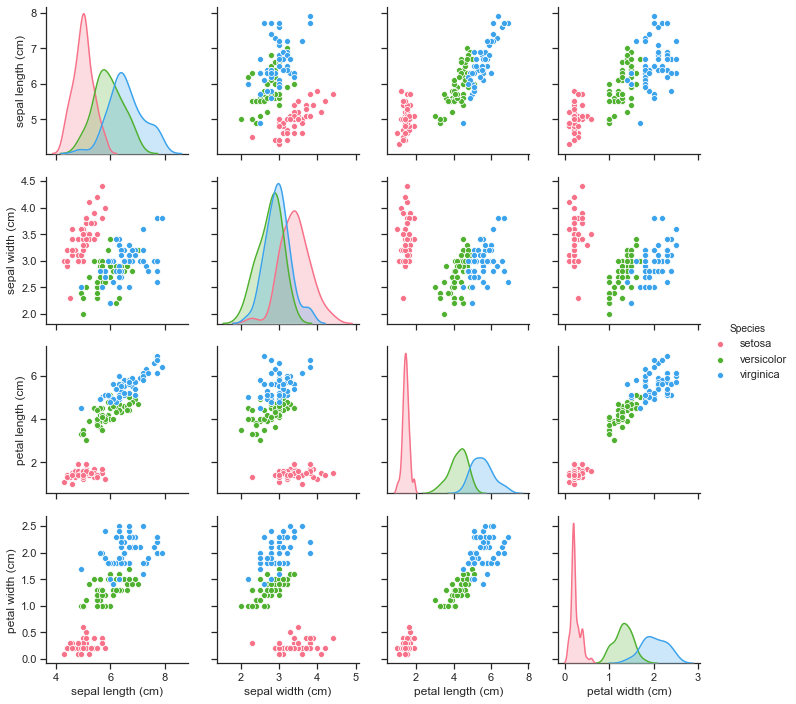

In [3]:
import seaborn as sns
#del data['Id'] # 인덱스 열 삭제
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

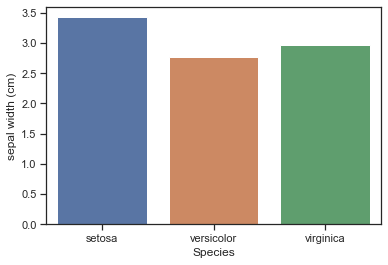

In [5]:
sns.barplot(data['Species'], data['sepal width (cm)'], ci=None)
# 각 종과 특성에 대한 연관 관계

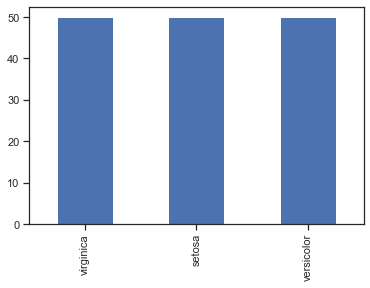

In [6]:
import matplotlib.pyplot as plt
data['Species'].value_counts().plot(kind='bar')

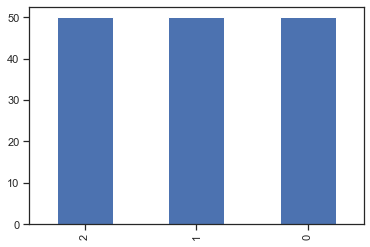

In [10]:
data['Species'] = data['Species'].replace(['virginica','setosa','versicolor'],[0,1,2])
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'].value_counts().plot(kind='bar')

In [11]:
from sklearn.model_selection import train_test_split
data_X = data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].values # X 데이터에 해당됩니다. X는 총 4개입니다.
data_y = data['Species'].values # Y 데이터에 해당됩니다. 예측해야하는 값입니다.

print(data_X[:5]) #X에 해당되는 데이터를 10개만 출력합니다.
print(data_y[:5]) #y에 해당되는 데이터를 10개만 출력합니다.

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [12]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞습니다.
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
# 훈련 데이터와 테스트 데이터에 대해서 원-핫 인코딩
print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


### (2) 소프트맥스 회귀

In [13]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd=optimizers.SGD(lr=0.01)
# 학습률(learning rate, lr)은 0.01로 합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
# 옵티마이저는 경사하강법의 일종인 adam을 사용합니다.
# 손실 함수(Loss function)는 크로스 엔트로피 함수를 사용합니다.
history=model.fit(X_train,y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 0s 2ms/sample - loss: 1.1159 - acc: 0.3667 - val_loss: 1.1345 - val_acc: 0.2000
Epoch 2/200
120/120 [==============================] - ETA: 0s - loss: 0.8865 - acc: 0.4409   - 0s 1ms/sample - loss: 0.9018 - acc: 0.4333 - val_loss: 0.9689 - val_acc: 0.4000
Epoch 3/200
120/120 [==============================] - 0s 1ms/sample - loss: 0.8393 - acc: 0.6917 - val_loss: 0.8911 - val_acc: 0.5667
Epoch 4/200
120/120 [==============================] - 0s 799us/sample - loss: 0.7941 - acc: 0.7333 - val_loss: 0.8503 - val_acc: 0.5667
Epoch 5/200
120/120 [==============================] - 0s 936us/sample - loss: 0.7529 - acc: 0.7583 - val_loss: 0.8126 - val_acc: 0.5667
Epoch 6/200
120/120 [==============================] - 0s 946us/sample - loss: 0.7185 - acc: 0.7250 - val_loss: 0.7725 - val_acc: 0.5667
Epoch 7/200
120/1

120/120 [==============================] - 0s 873us/sample - loss: 0.3266 - acc: 0.9500 - val_loss: 0.3733 - val_acc: 0.8333
Epoch 58/200
120/120 [==============================] - 0s 881us/sample - loss: 0.3255 - acc: 0.9667 - val_loss: 0.3786 - val_acc: 0.8333
Epoch 59/200
120/120 [==============================] - 0s 831us/sample - loss: 0.3206 - acc: 0.9333 - val_loss: 0.3679 - val_acc: 0.8333
Epoch 60/200
120/120 [==============================] - 0s 1ms/sample - loss: 0.3173 - acc: 0.9417 - val_loss: 0.3579 - val_acc: 0.8667
Epoch 61/200
120/120 [==============================] - 0s 1ms/sample - loss: 0.3171 - acc: 0.9500 - val_loss: 0.3646 - val_acc: 0.8333
Epoch 62/200
120/120 [==============================] - 0s 964us/sample - loss: 0.3144 - acc: 0.9500 - val_loss: 0.3512 - val_acc: 0.8667
Epoch 63/200
120/120 [==============================] - 0s 1ms/sample - loss: 0.3116 - acc: 0.9417 - val_loss: 0.3440 - val_acc: 0.9000
Epoch 64/200
120/120 [==============================]

120/120 [==============================] - 0s 1ms/sample - loss: 0.2233 - acc: 0.9667 - val_loss: 0.2573 - val_acc: 0.9667
Epoch 117/200
120/120 [==============================] - 0s 981us/sample - loss: 0.2210 - acc: 0.9667 - val_loss: 0.2577 - val_acc: 0.9667
Epoch 118/200
120/120 [==============================] - 0s 825us/sample - loss: 0.2182 - acc: 0.9667 - val_loss: 0.2496 - val_acc: 0.9667
Epoch 119/200
120/120 [==============================] - 0s 773us/sample - loss: 0.2182 - acc: 0.9667 - val_loss: 0.2527 - val_acc: 0.9667
Epoch 120/200
120/120 [==============================] - 0s 989us/sample - loss: 0.2163 - acc: 0.9750 - val_loss: 0.2615 - val_acc: 0.9000
Epoch 121/200
120/120 [==============================] - 0s 963us/sample - loss: 0.2152 - acc: 0.9667 - val_loss: 0.2543 - val_acc: 0.9667
Epoch 122/200
120/120 [==============================] - 0s 914us/sample - loss: 0.2139 - acc: 0.9667 - val_loss: 0.2543 - val_acc: 0.9333
Epoch 123/200
120/120 [====================

Epoch 175/200
120/120 [==============================] - 0s 877us/sample - loss: 0.1699 - acc: 0.9667 - val_loss: 0.2118 - val_acc: 0.9333
Epoch 176/200
120/120 [==============================] - 0s 893us/sample - loss: 0.1683 - acc: 0.9750 - val_loss: 0.2061 - val_acc: 0.9667
Epoch 177/200
120/120 [==============================] - 0s 889us/sample - loss: 0.1683 - acc: 0.9667 - val_loss: 0.2025 - val_acc: 1.0000
Epoch 178/200
120/120 [==============================] - 0s 956us/sample - loss: 0.1662 - acc: 0.9667 - val_loss: 0.2013 - val_acc: 1.0000
Epoch 179/200
120/120 [==============================] - 0s 939us/sample - loss: 0.1672 - acc: 0.9667 - val_loss: 0.2001 - val_acc: 1.0000
Epoch 180/200
120/120 [==============================] - 0s 858us/sample - loss: 0.1655 - acc: 0.9583 - val_loss: 0.1955 - val_acc: 1.0000
Epoch 181/200
120/120 [==============================] - 0s 785us/sample - loss: 0.1661 - acc: 0.9667 - val_loss: 0.2050 - val_acc: 0.9667
Epoch 182/200
120/120 [====

- 이진 분류 문제에서는 binary_crossentropy를 사용하였지만, 다중 클래스 분류 문제에서는 'categorical_crossentropy를 기재
- 옵티마이저로는 경사 하강법의 일종인 adam을 사용
- epoch = 200
- validation_data=()에 테스트 데이터를 기재해주면 실제로는 훈련에는 반영 안되면서 각 훈련횟수마다 테스트 데이터에 대한 정확도 출력
- acc : 훈련데이터에 대한 정확도
- val_acc : 테스트데이터에 대한 정확도

In [17]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

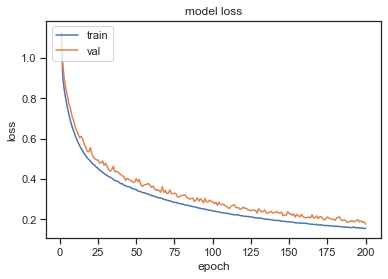

In [18]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

30/30 [==============================] - 0s 201us/sample - loss: 0.1764 - acc: 1.0000

 테스트 정확도: 1.0000


## 6) 인공 신경망 다이어그램